HABIB FABRI ARROSYID (G6401221013)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
from math import log2
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Link Dataset : https://drive.google.com/file/d/17SOG7TaS1svJgEhKNiYMRs53oMzQPToi/view?usp=sharing

Petunjuk Penggunaan : Upload ke Drive file dataset lalu copy pathnya

In [4]:
df=pd.read_csv('/content/drive/MyDrive/soil_suitability.csv')
df.head()

,pH Level,Moisture Content (%),Organic Matter (%),Drainage Quality,Soil Texture,Suitability
0,5.9,72,5.5,Good,Loamy,Not Suitable
1,8.8,26,7.5,Poor,Sandy,Not Suitable
2,7.7,42,2.0,Poor,Sandy,Not Suitable
3,7.0,38,2.3,Good,Sandy,Not Suitable
4,4.8,22,3.4,Good,Loamy,Not Suitable


Pendeskripsian Data (Menjelaskan isi keseluruhan data meliputi mean, dan sebagainya)

In [5]:
df.describe()

,pH Level,Moisture Content (%),Organic Matter (%)
count,500.000000,500.000000,500.000000
mean,6.494400,43.970000,5.498200
std,1.492429,20.665605,2.622933
min,4.000000,10.000000,1.000000
25%,5.200000,26.000000,3.275000
50%,6.600000,43.500000,5.600000
75%,7.800000,61.250000,7.700000
max,9.000000,80.000000,10.000000


Cek kekosongan data

In [6]:
df.isna().sum()

,0
pH Level,0
Moisture Content (%),0
Organic Matter (%),0
Drainage Quality,0
Soil Texture,0
Suitability,0


Cek ukuran data keseluruhan

In [7]:
df.shape

(500, 6)

Melihat tipe data keseluruhan

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pH Level              500 non-null    float64
 1   Moisture Content (%)  500 non-null    int64  
 2   Organic Matter (%)    500 non-null    float64
 3   Drainage Quality      500 non-null    object 
 4   Soil Texture          500 non-null    object 
 5   Suitability           500 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 23.6+ KB


In [9]:
def entropy(data, target):
    values, counts = np.unique(data[target], return_counts=True)
    total = sum(counts)
    ent = -sum((counts[i] / total) * log2(counts[i] / total) for i in range(len(values)))
    return ent

def information_gain(data, split_attribute, target):
    total_entropy = entropy(data, target)
    values, counts = np.unique(data[split_attribute], return_counts=True)
    weighted_entropy = sum(
        (counts[i] / sum(counts)) * entropy(data[data[split_attribute] == values[i]], target)
        for i in range(len(values))
    )
    return total_entropy - weighted_entropy

In [10]:
def id3(data, features, target, parent_class=None):
    if len(np.unique(data[target])) == 1:
        return np.unique(data[target])[0]
    elif len(features) == 0:
        return data[target].mode()[0]
    else:
        parent_class = data[target].mode()[0]
        gains = {feature: information_gain(data, feature, target) for feature in features}
        best_feature = max(gains, key=gains.get)
        tree = {best_feature: {}}
        features = [f for f in features if f != best_feature]
        for value in np.unique(data[best_feature]):
            subtree = id3(
                data[data[best_feature] == value], features, target, parent_class
            )
            tree[best_feature][value] = subtree
        return tree

In [11]:
def display_tree(tree, indent=""):
    if isinstance(tree, dict):
        for key, value in tree.items():
            print(f"{indent}{key}")
            display_tree(value, indent + "  ")
    else:
        print(f"{indent}--> {tree}")

def check_label_distribution(data, target):
    print("Distribusi label pada kolom target:")
    print(data[target].value_counts(normalize=True))
    print()

#PREPROCESSING

In [12]:
df.tail()

,pH Level,Moisture Content (%),Organic Matter (%),Drainage Quality,Soil Texture,Suitability
495,5.8,47,9.5,Good,Sandy,Not Suitable
496,6.9,43,7.6,Poor,Sandy,Not Suitable
497,4.4,26,2.5,Good,Sandy,Not Suitable
498,8.9,46,2.7,Good,Sandy,Not Suitable
499,8.9,34,7.6,Good,Sandy,Not Suitable


Import Encoder untuk mengubah data kategorikal menjadi numerikal

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
en = LabelEncoder

In [15]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()


Pelabelan data kategorikal pada kolom drainage quality

In [16]:
d = {'Poor': 0, 'Good': 1}
df['Drainage Quality'] = df['Drainage Quality'].map(d)



In [17]:
df

,pH Level,Moisture Content (%),Organic Matter (%),Drainage Quality,Soil Texture,Suitability
0,5.9,72,5.5,1,Loamy,Not Suitable
1,8.8,26,7.5,0,Sandy,Not Suitable
2,7.7,42,2.0,0,Sandy,Not Suitable
3,7.0,38,2.3,1,Sandy,Not Suitable
4,4.8,22,3.4,1,Loamy,Not Suitable
...,...,...,...,...,...,...
495,5.8,47,9.5,1,Sandy,Not Suitable
496,6.9,43,7.6,0,Sandy,Not Suitable
497,4.4,26,2.5,1,Sandy,Not Suitable
498,8.9,46,2.7,1,Sandy,Not Suitable


Encoding pada kolom soil texture (berdasarkan random yang berarti urutan abjad, clay=0, loamy = 1, sandy=2)

In [18]:

df['Soil Texture'] = en.fit_transform(df['Soil Texture'])



In [19]:
df.head()

,pH Level,Moisture Content (%),Organic Matter (%),Drainage Quality,Soil Texture,Suitability
0,5.9,72,5.5,1,1,Not Suitable
1,8.8,26,7.5,0,2,Not Suitable
2,7.7,42,2.0,0,2,Not Suitable
3,7.0,38,2.3,1,2,Not Suitable
4,4.8,22,3.4,1,1,Not Suitable


In [20]:
df['Suitability'] = df['Suitability'].map({
    'Not Suitable': 0,
    'Suitable': 1
})

In [21]:
df

,pH Level,Moisture Content (%),Organic Matter (%),Drainage Quality,Soil Texture,Suitability
0,5.9,72,5.5,1,1,0
1,8.8,26,7.5,0,2,0
2,7.7,42,2.0,0,2,0
3,7.0,38,2.3,1,2,0
4,4.8,22,3.4,1,1,0
...,...,...,...,...,...,...
495,5.8,47,9.5,1,2,0
496,6.9,43,7.6,0,2,0
497,4.4,26,2.5,1,2,0
498,8.9,46,2.7,1,2,0


In [22]:
import numpy as np
from scipy.stats import zscore

In [23]:
df.head()

,pH Level,Moisture Content (%),Organic Matter (%),Drainage Quality,Soil Texture,Suitability
0,5.9,72,5.5,1,1,0
1,8.8,26,7.5,0,2,0
2,7.7,42,2.0,0,2,0
3,7.0,38,2.3,1,2,0
4,4.8,22,3.4,1,1,0


In [24]:
target = df['Suitability']
target.head(100)

,Suitability
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,0
97,0
98,0


In [25]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# numerical_columns = ['pH Level', 'Moisture Content (%)', 'Organic Matter (%)','Drainage Quality','Soil Texture']
# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [26]:
df

,pH Level,Moisture Content (%),Organic Matter (%),Drainage Quality,Soil Texture,Suitability
0,5.9,72,5.5,1,1,0
1,8.8,26,7.5,0,2,0
2,7.7,42,2.0,0,2,0
3,7.0,38,2.3,1,2,0
4,4.8,22,3.4,1,1,0
...,...,...,...,...,...,...
495,5.8,47,9.5,1,2,0
496,6.9,43,7.6,0,2,0
497,4.4,26,2.5,1,2,0
498,8.9,46,2.7,1,2,0


In [27]:
df_atribut = df.drop(columns='Suitability')
df_atribut

,pH Level,Moisture Content (%),Organic Matter (%),Drainage Quality,Soil Texture
0,5.9,72,5.5,1,1
1,8.8,26,7.5,0,2
2,7.7,42,2.0,0,2
3,7.0,38,2.3,1,2
4,4.8,22,3.4,1,1
...,...,...,...,...,...
495,5.8,47,9.5,1,2
496,6.9,43,7.6,0,2
497,4.4,26,2.5,1,2
498,8.9,46,2.7,1,2


In [28]:
target

,Suitability
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(df_atribut, target, test_size=0.45, random_state=500)

# Latih Decision Tree
df_tree = DecisionTreeClassifier(criterion="entropy", random_state=500)
df_tree.fit(x_train, y_train)



DecisionTreeClassifier(criterion='entropy', random_state=500)

In [31]:
print('Akurasi pada data testing : ', df_tree.score(x_test, y_test))

Akurasi pada data testing :  0.9866666666666667


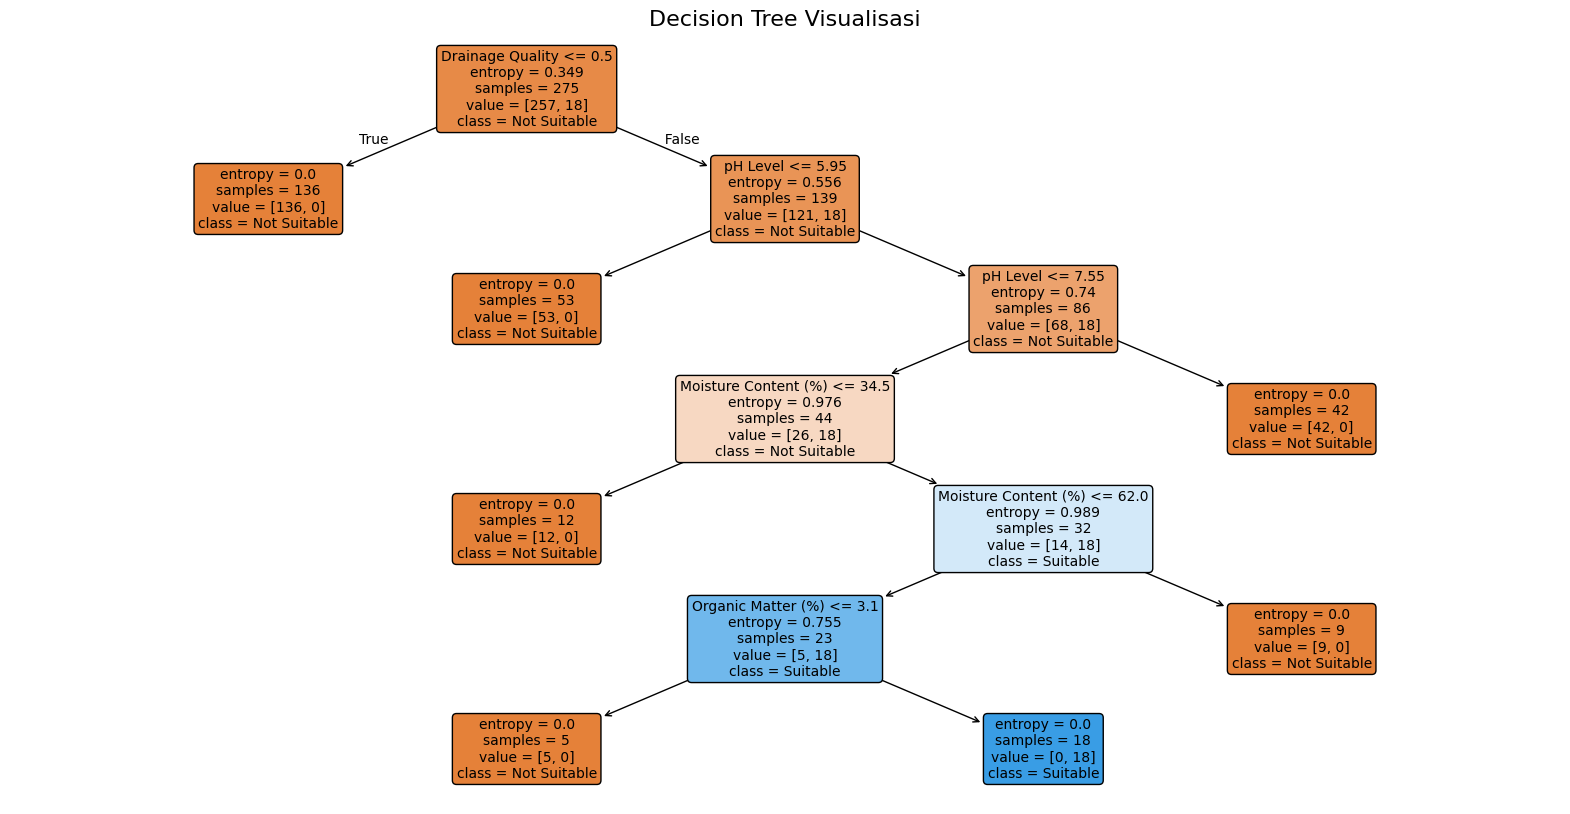

In [32]:
# Visualisasi pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(
    df_tree,
    feature_names=df_atribut.columns,
    class_names=["Not Suitable", "Suitable"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualisasi", fontsize=16)
plt.show()

REPORT UNTUK EVALUASI KINERJA

In [33]:
y_pred = df_tree.predict(x_test)
print('Hasil:',classification_report(y_test,y_pred))

Hasil:               precision    recall  f1-score   support

           0       0.99      1.00      0.99       218
           1       0.83      0.71      0.77         7

    accuracy                           0.99       225
   macro avg       0.91      0.85      0.88       225
weighted avg       0.99      0.99      0.99       225



TEST DATA

In [34]:
test_sample = [[6.5, 45, 4.2, 1, 0]]
prediction = df_tree.predict(test_sample)

# Tampilkan hasil prediksi
result = 'Suitable' if prediction[0] == 1 else 'Not Suitable'
print(f"Hasil Prediksi Sampel : {result}")

Hasil Prediksi Sampel : Suitable


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [35]:
print('Akurasi:',accuracy_score(y_test,y_pred))

Akurasi: 0.9866666666666667


In [36]:
# print('Hasil:',classification_report(Y_test,y_pred))

In [37]:
print(df_tree.predict([[5.9,	72,	5.5,	1,	1]])) #predict tanpa simpulan jawaban cuma 0/1

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [38]:
print(df_tree.predict([[7.5,	56,	5.4,	0,	2]]))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [39]:
print(df_tree.predict([[7.5,	56,	5.4,	1,	2]]))
test_sample = [[7.5, 56, 5.4, 1, 2]]
prediction = df_tree.predict(test_sample)

# Tampilkan hasil prediksi
result = 'Suitable' if prediction[0] == 1 else 'Not Suitable'
print(f"Hasil Prediksi  Sampel : {result}")

[1]
Hasil Prediksi  Sampel : Suitable


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [40]:
# Model ID3
atribut = list(x_train.columns)
target = 'Suitability'
train_data = pd.concat([x_train, y_train], axis=1)

tree = id3(train_data, atribut, target)

In [41]:
# Pohon keputusan
print("Decision Tree ID3:")
display_tree(tree)

Decision Tree ID3:
Moisture Content (%)
  10
    --> 0
  11
    --> 0
  12
    --> 0
  13
    --> 0
  14
    --> 0
  15
    --> 0
  16
    --> 0
  17
    --> 0
  18
    --> 0
  19
    --> 0
  20
    --> 0
  21
    --> 0
  22
    --> 0
  23
    --> 0
  24
    --> 0
  25
    --> 0
  26
    --> 0
  27
    --> 0
  28
    --> 0
  29
    --> 0
  30
    --> 0
  31
    --> 0
  32
    --> 0
  33
    --> 0
  34
    --> 0
  35
    Organic Matter (%)
      1.0
        --> 0
      1.2
        --> 0
      4.5
        --> 1
      4.6
        --> 1
      4.9
        --> 0
      5.2
        --> 0
      6.1
        --> 0
      8.5
        --> 0
      10.0
        --> 0
  36
    pH Level
      6.0
        --> 1
      6.3
        --> 1
      7.0
        --> 1
      7.6
        --> 0
  38
    pH Level
      6.7
        --> 1
      7.0
        --> 0
      8.0
        --> 0
      8.5
        --> 0
  39
    --> 0
  40
    pH Level
      6.4
        --> 0
      7.3
        --> 1
  41
    pH Level
      4.5
   

In [42]:
def predict(tree, instance):
    if not isinstance(tree, dict):
        return tree
    atribut = list(tree.keys())[0]
    value = instance[atribut]
    if value in tree[atribut]:
        return predict(tree[atribut][value], instance)
    else:
        return None  # Jika nilai tidak ada dalam pohon


In [43]:
print(f"Akurasi model ID3 pada data uji: ",accuracy_score(y_test,y_pred))

Akurasi model ID3 pada data uji:  0.9866666666666667
